(30, 11)
(1,)
(1470, 30, 11)
(1470, 1)
Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\envs\bkhan2002\lib\site-packages\ipykernel_launcher.py:89: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\ProgramData\Anaconda3\envs\bkhan2002\lib\site-packages\ipykernel_launcher.py:89: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=True, stateful=False, input_shape=(30, 11))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 128)           71680     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 203,393
Trainable params: 203,393
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1470 samples, validate on 630 samples
Epoch 1/100
1470/1470 [==============================] - 4s 3ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 2/100
1470/1470 [==============================] - 3s 2ms/step -

1470/1470 [==============================] - 3s 2ms/step - loss: 1.0442e-04 - val_loss: 0.0028
Epoch 66/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.0441e-04 - val_loss: 0.0026
Epoch 67/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.0095e-04 - val_loss: 0.0032
Epoch 68/100
1470/1470 [==============================] - 3s 2ms/step - loss: 9.6409e-05 - val_loss: 0.0032
Epoch 69/100
1470/1470 [==============================] - 3s 2ms/step - loss: 9.4292e-05 - val_loss: 0.0033
Epoch 70/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.1162e-04 - val_loss: 0.0038
Epoch 71/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.0034e-04 - val_loss: 0.0037
Epoch 72/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.1133e-04 - val_loss: 0.0034
Epoch 73/100
1470/1470 [==============================] - 3s 2ms/step - loss: 1.1669e-04 - val_loss: 0.0034
Epoch 74/100
1470/1470 [=================

No handles with labels found to put in legend.


[0.002841064051757044, 0.00019055226881874306, 0.00016131759971636821, 0.00014624852337874472, 0.00014943490413668546, 0.00018992289358498148, 0.00017273307628561362, 0.00015163296929855203, 0.00016268912240404313, 0.00015117990373329698, 0.00019740826706877168, 0.00013430126793017344, 0.00013077156301956073, 0.00013082014651890673, 0.0001542965615137328, 0.00014630550875302346, 0.00012703634467693426, 0.00012387571709672446, 0.00011317376339896012, 0.00012460754702000746, 0.00013140664950882713, 0.0001268625171493967, 0.00011188463365530824, 0.00013584641649741773, 0.00013713764268204057, 0.0001082311704225021, 0.00011860622737226457, 0.0001374368867819074, 0.0001114509764842556, 0.00013372154100988137, 0.0001239592744909436, 0.00013562475853214724, 0.000126243616176332, 0.00011213636753382161, 0.00012155016112065284, 0.00011836065734351739, 0.00010651178761653849, 0.00011152336060613565, 0.00012602310974272062, 0.00011273852623143823, 0.00010933574988169367, 0.00010107470675114998, 0

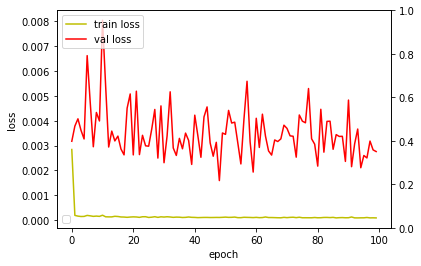

630/630 [==============================] - 1s 950us/step


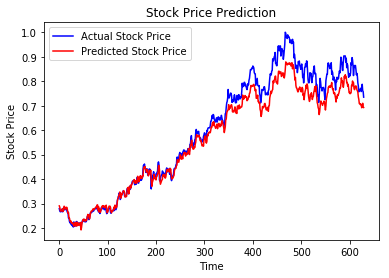

In [4]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import logging
import math
import os
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import load_model

np.random.seed(7)



## 데이터 불러오기 / Data Preparation
stock_code = '005930_indi01.csv' # 삼성전자 / Samsung
encoding = 'euc-kr'
names01 = ['Date', 'Open', 'High', 'Low', 'Close', 'Close5ma', 'Close10ma', 'Close20ma', 
         'Close60ma', 'Volume', 'Volume5ma', 'Volume10ma', 'Volume20ma', 'Volume60ma', 'RSI', 'CCI', 'DIP', 'DIM',
         'ADX', 'WilliamsR', 'MACDOscillator', 'MACD', 'MACDSignal', 'Disparity5', 'Disparity10', 'Disparity20', 'Disparity60']

df = pd.read_csv(stock_code, names=names01, index_col='Date', engine='python', encoding=encoding)

## names01 데이터 목록 해설 / names01's data list
# DIP = 'DMI 지표중 PDI / DMI's PDI', DIM = 'DMI 지표중 MDI / DMI's MDI', Disparity = '이격도'

### 데이터 전처리 / Data Preprocessing
price_indicator = df.loc[:,'Open':'Close'].values[1:].astype(np.float) # 가격 관련 지표 / Price Indicator
volume_indicator = df.loc[:,'Volume':'Volume'].values[1:].astype(np.float) # 거래량 관련 지표 / Volume Indicator
etc_indicator = df.loc[:,'RSI':'WilliamsR'].values[1:].astype(np.float) # 추세 또는 거래량 활용 지표 / Trend and Volume Indicator


scaler = MinMaxScaler(feature_range=(0, 1)) # 0~1 값으로 스케일링
scaled_price_indicator = scaler.fit_transform(price_indicator) # 가격 관련 지표에 스케일링
scaled_volume_indicator = scaler.fit_transform(volume_indicator) # 거래량 관련 지표에 스케일링
scaler_etc = MinMaxScaler(feature_range=(-1, 1)) # 0~1 값으로 스케일링
scaled_etc_indicator = scaler_etc.fit_transform(etc_indicator) # 추세 또는 거래량 활용 지표에 스케일링



## 데이터셋 생성하기 / Creating Dataset

# 행은 그대로 두고 열을 우측에 붙여 합친다 / leave the row, and attach columns to right
x = np.concatenate((scaled_price_indicator, scaled_volume_indicator, scaled_etc_indicator), axis=1) # axis=1
y = x[:, [3]] # 타켓은 주식 종가이다 / target is 'Close' price

# dataX와 dataY 생성 / Creating dataset 'dataX' and 'dataY'
seq_length = 30

dataX = [] # 입력으로 사용될 Sequence Data / Input - Sequence Data
dataY = [] # 출력(타켓)으로 사용 / Output(target)
for i in range(0, int(len(y) - seq_length)):
    _x = x[i : i + seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답) / after 5 days later (in _x), 'Close' price is the correct answer.
    dataX.append(_x) # dataX 리스트에 추가 / add to dataX's list
    dataY.append(_y) # dataY 리스트에 추가 / add to dataY's list


# 학습용/테스트용 데이터 생성
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

print("="*50)
print(_x.shape)
print(_y.shape)
print(trainX.shape)
print(trainY.shape)
print("="*50)

## LSTM 모델

input_columns = 11

model = Sequential()
model.add(LSTM(128, input_dim=input_columns, input_length=seq_length, return_sequences=True, stateful=False))
model.add(LSTM(128, return_sequences=False, stateful=False))
model.add(Dense(1))
model.add(Activation('linear'))
# , dropout=0.2


# 모델 학습 설정 및 진행
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
print("="*50)
hist = model.fit(trainX, trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX, testY))


# 학습 과정 살펴보기
print(hist.history['loss'])
print(hist.history['val_loss'])
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()



# 예측
y_pred = model.predict(testX, batch_size=10, verbose=1) # , steps=5
plt.plot(testY, color = 'blue', label = 'Actual Stock Price')
plt.plot(y_pred, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# 모델 저장
model.save('lstm_stock_prediction_01.h5')